In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [87]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [16]:
houseprice = pd.read_csv('data/Ames_HousePrice_cleaned.csv')
houseprice

x_train = pd.read_csv('data/x_train_dummies.csv')
x_test = pd.read_csv('data/x_test_dummies.csv')
y_train = pd.read_csv('data/y_train_dummies.csv')
y_test = pd.read_csv('data/y_test_dummies.csv')

# exclude PIDs from analysis 
x_train.iloc[:,1:].head()

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0,1080,7500,7,5,2004,2005,120.0,680.0,0.0,1080.0,...,0,1,0,0,0,1,0,0,0,1
1,1382,8923,7,5,1998,1998,0.0,189.0,0.0,384.0,...,0,1,0,0,0,1,0,0,0,1
2,1446,21872,7,5,1996,1997,0.0,604.0,0.0,729.0,...,0,1,0,0,0,1,0,0,0,1
3,1448,7500,8,5,2006,2007,238.0,24.0,0.0,1372.0,...,0,1,0,0,0,1,0,0,0,1
4,1733,12394,7,5,2003,2003,0.0,0.0,0.0,847.0,...,0,1,0,0,1,0,0,0,0,1


### `Lasso Regression`

In [94]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

ss = StandardScaler()
xtrain_scalar = ss.fit_transform(x_train)

alphas = np.logspace(0,.5,50)
lassocv = LassoCV(cv=8, max_iter =100000, normalize=True, random_state=0)
coefs_lassocv = [] 
result = {}
# trainscore = [] 
# testscore = [] 

for alpha in alphas:
    lassocv.fit(x_train.iloc[:,1:], y_train['SalePrice'])
    coefs_lassocv.append(lassocv.coef_)
    result[alpha] = lassocv.score(x_test.iloc[:, 1:], y_test)

result
# alpha_best = lassocv.alpha_
# lassocv_coefs = lassocv.coef_


# trainscore.append(lassocv.score(x_train.iloc[:,1:], y_train))
# testscore.append(lassocv.score(x_test.iloc[:,1:], y_test))

# print('Best alpha: {}'.format(lassocv.alpha_))
# print('Train Score: {}'.format(trainscore))
# print('Test Score: {}'.format(testscore))

# the Lasso CV model provided the same scores as non CV Lasso 

# lasso=Lasso()
# alphas = np.logspace(-2,3,50)
# lasso.set_params(normalize=True)
# coefs_lasso = [] 
# result = {} 

# for alpha in alphas:
#    lasso.set_params(alpha = alpha)
#    lasso.fit(x_train.iloc[:,1:], y_train)
#    coefs_lasso.append(lasso.coef_)
#    result[alpha] = lasso.score(x_test.iloc[:, 1:], y_test)

# result

{1.0: 0.9196311116395077,
 1.023773966339585: 0.9196311116395077,
 1.0481131341546857: 0.9196311116395077,
 1.0730309405261562: 0.9196311116395077,
 1.0985411419875581: 0.9196311116395077,
 1.1246578221198198: 0.9196311116395077,
 1.1513953993264474: 0.9196311116395077,
 1.1787686347935873: 0.9196311116395077,
 1.2067926406393286: 0.9196311116395077,
 1.235482888256747: 0.9196311116395077,
 1.264855216855296: 0.9196311116395077,
 1.2949258422052623: 0.9196311116395077,
 1.3257113655901092: 0.9196311116395077,
 1.3572287829716536: 0.9196311116395077,
 1.3894954943731377: 0.9196311116395077,
 1.4225293134853696: 0.9196311116395077,
 1.4563484775012439: 0.9196311116395077,
 1.4909716571840643: 0.9196311116395077,
 1.5264179671752334: 0.9196311116395077,
 1.5627069765469952: 0.9196311116395077,
 1.599858719606058: 0.9196311116395077,
 1.637893706954064: 0.9196311116395077,
 1.676832936811008: 0.9196311116395077,
 1.7166979066078605: 0.9196311116395077,
 1.7575106248547918: 0.91963111163950

In [83]:
coefs_lassocv = pd.DataFrame(coefs_lassocv, index=alphas, columns=x_train.columns[1:])
coefs_lassocv.head()


,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
1.000000,49.473764,0.399243,9283.111312,5889.510717,335.043711,0.0,30.041893,21.174429,13.98691,15.997634,...,-4170.579324,550.63055,-4546.98136,0.0,-15894.844413,2393.021365,15828.093725,3652.153643,-0.0,-524.937254
1.023774,49.473764,0.399243,9283.111312,5889.510717,335.043711,0.0,30.041893,21.174429,13.98691,15.997634,...,-4170.579324,550.63055,-4546.98136,0.0,-15894.844413,2393.021365,15828.093725,3652.153643,-0.0,-524.937254
1.048113,49.473764,0.399243,9283.111312,5889.510717,335.043711,0.0,30.041893,21.174429,13.98691,15.997634,...,-4170.579324,550.63055,-4546.98136,0.0,-15894.844413,2393.021365,15828.093725,3652.153643,-0.0,-524.937254
1.073031,49.473764,0.399243,9283.111312,5889.510717,335.043711,0.0,30.041893,21.174429,13.98691,15.997634,...,-4170.579324,550.63055,-4546.98136,0.0,-15894.844413,2393.021365,15828.093725,3652.153643,-0.0,-524.937254
1.098541,49.473764,0.399243,9283.111312,5889.510717,335.043711,0.0,30.041893,21.174429,13.98691,15.997634,...,-4170.579324,550.63055,-4546.98136,0.0,-15894.844413,2393.021365,15828.093725,3652.153643,-0.0,-524.937254


In [80]:
lassocv.alpha_

4.025322006678849

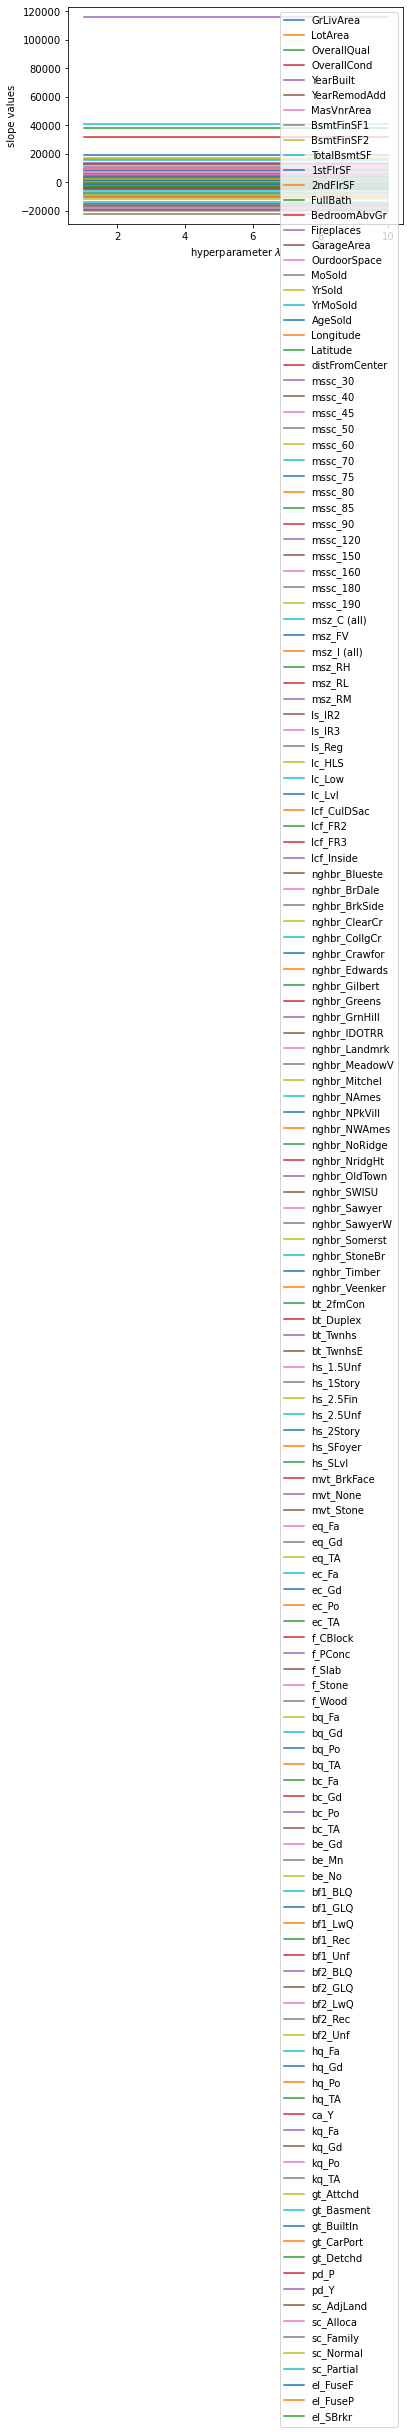

In [81]:
for name in coefs_lassocv.columns:
    plt.plot(coefs_lassocv.index, coefs_lassocv[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)

In [93]:
lasso=Lasso()
alphas = np.logspace(-2,4,20)
lasso.set_params(normalize=True)
coefs_lasso = [] 
result = {} 

for alpha in alphas:
   lasso.set_params(alpha = alpha)
   lasso.fit(x_train.iloc[:,1:], y_train)
   coefs_lasso.append(lasso.coef_)
   result[alpha] = lasso.score(x_test.iloc[:, 1:], y_test)

result
# best alpha  54.286754393238596

/Users/michellebui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.351e+11, tolerance: 1.023e+09
  model = cd_fast.enet_coordinate_descent(
/Users/michellebui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.000e+10, tolerance: 1.023e+09
  model = cd_fast.enet_coordinate_descent(
/Users/michellebui/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

{0.01: 0.9191560498740309,
 0.0206913808111479: 0.9191779119652491,
 0.04281332398719394: 0.919222873308375,
 0.08858667904100823: 0.9192718200855943,
 0.18329807108324356: 0.919357971359387,
 0.37926901907322497: 0.9195086158517629,
 0.7847599703514611: 0.91968038397289,
 1.623776739188721: 0.9198594535962872,
 3.359818286283781: 0.9198039494040458,
 6.951927961775605: 0.918799589921892,
 14.38449888287663: 0.9148748215901792,
 29.76351441631316: 0.9044255854437332,
 61.584821106602604: 0.8835864435414104,
 127.42749857031322: 0.8554618252961302,
 263.6650898730355: 0.7991674049747157,
 545.5594781168514: 0.6538655727996674,
 1128.8378916846884: 0.22041733740143465,
 2335.7214690901214: -0.002424866478625942,
 4832.930238571752: -0.002424866478625942,
 10000.0: -0.002424866478625942}

In [52]:
lasso.coef_

array([ 4.47321154e+00,  0.00000000e+00,  1.18528206e+04, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [50]:
coefs_lasso = pd.DataFrame(coefs_lasso, index=alphas, columns = x_train.columns[1:])
coefs_lasso.head()

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0.010000,50.950958,0.404541,8458.019159,6387.576089,360.717174,291.414748,30.188620,22.072676,19.033026,13.770914,...,-4348.067222,1770.568068,-12368.809005,2841.390945,-13757.887775,4859.142718,15568.100597,5923.142629,-2241.785327,-783.175553
0.012649,50.866438,0.404561,8457.806751,6386.832106,360.699794,280.877271,30.187842,22.071342,19.030388,13.771412,...,-4348.620632,1769.135419,-12363.710258,2832.598467,-13756.370790,4858.326480,15570.163344,5918.923381,-2232.932644,-784.726585
0.015999,50.759407,0.404580,8457.238510,6385.896494,360.678836,267.552789,30.186279,22.069716,19.026274,13.773100,...,-4349.073534,1767.634028,-12355.912782,2820.412010,-13755.292313,4857.177210,15572.465082,5914.394030,-2220.040370,-786.579538
0.020236,50.623973,0.404605,8456.520844,6384.713719,360.652130,250.699654,30.184310,22.067666,19.021081,13.775236,...,-4349.640846,1765.741853,-12346.038353,2804.996774,-13753.927079,4855.724963,15575.380133,5908.670119,-2203.729181,-788.918277
0.025595,50.452953,0.404636,8455.619936,6383.218605,360.618356,229.381021,30.181822,22.065075,19.014522,13.777948,...,-4350.341675,1763.364400,-12333.571549,2785.495901,-13752.214490,4853.888034,15579.066828,5901.452829,-2183.086196,-791.862023


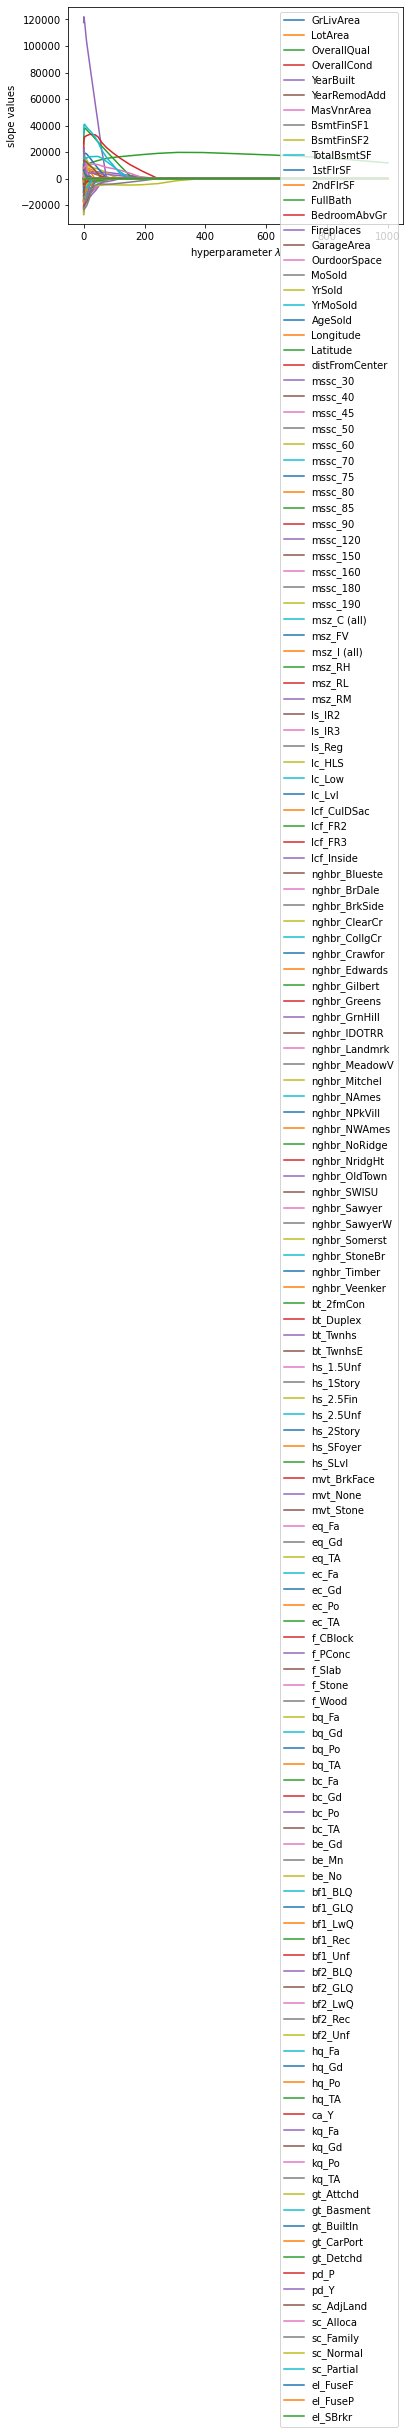

In [51]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)

### `Ridge Regression`

In [ ]:
y_train.head()

,SalePrice
0,141000
1,177500
2,175000
3,238500
4,225000


In [95]:
ridge_alphas = np.logspace(-2, 5, 100)
ridgecv = RidgeCV(alphas = ridge_alphas, cv = 8, normalize=True)

trainscore = [] 
testscore = [] 

ridgecv.fit(x_train, y_train)

ralpha_best = ridgecv.alpha_
coefs = ridge.coef_

trainscore.append(ridgecv.score(x_train, y_train))
testscore.append(ridgecv.score(x_test, y_test))

print('Best alpha: {}'.format(ralpha_best))
print('Train Score: {}'.format(trainscore))
print('Test Score: {}'.format(testscore))

# why are the Ridge CV results so different from the regular ridge regression results?


Best alpha: 0.026560877829466867
Train Score: [0.9193185068742621]
Test Score: [0.9192710741157554]


In [97]:
alpha2 = np.arange(0,20)
ridge = Ridge()
ridge.set_params(normalize=False)
coefs_ridge = [] 
results = {}

for alpha in alpha2: 
    ridge.set_params(alpha=alpha)
    ridge.fit(x_train.iloc[:,1:], y_train['SalePrice'])
    coefs_ridge.append(ridge.coef_)
    results[alpha] = ridge.score(x_test.iloc[:,1:], y_test['SalePrice'])

coefs_ridge = pd.DataFrame(coefs_ridge, index = alpha2, columns = x_train.columns[1:])
coefs_ridge.head()



,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0,50.193835,0.404278,8460.809254,6393.654412,361.534174,1.111614e+11,30.195135,22.038285,18.988920,13.764949,...,-4360.058672,1755.216150,-11885.920563,2743.511343,-13558.171811,4804.854750,15515.346589,5895.578787,-2390.561059,-729.328854
1,50.918188,0.419074,8782.704670,6299.327172,364.311291,-6.443031e+01,31.179293,22.381384,18.658514,14.289164,...,-3978.395003,1824.428971,-5544.072764,2376.048531,-13262.091700,4902.144798,16007.791696,4992.663642,-1978.324396,-941.976188
2,51.225049,0.426161,9046.351920,6274.649081,369.096055,-6.311196e+01,32.022609,22.467811,18.451756,14.702889,...,-3719.177287,1818.777363,-3755.309889,1814.007284,-12713.835208,4785.073311,16001.224313,4664.889844,-1549.248998,-1009.601981
3,51.349191,0.430973,9265.208511,6268.086755,373.669278,-6.136576e+01,32.800147,22.500385,18.338843,15.047834,...,-3531.013398,1779.308591,-2903.771626,1428.576828,-12169.617590,4621.210892,15867.256303,4436.380188,-1327.744788,-1074.208017
4,51.366624,0.434568,9453.420713,6268.149686,377.846346,-5.948367e+01,33.518540,22.510652,18.264083,15.343160,...,-3381.285865,1728.092926,-2400.619849,1157.871129,-11655.273099,4439.679193,15676.047719,4247.876730,-1210.122266,-1136.539468


In [ ]:
ridge.coef_

array([ 4.95371031e+01,  4.51041770e-01,  1.08825434e+04,  6.30566738e+03,
        4.08748400e+02, -3.97109766e+01,  4.02192569e+01,  2.23167598e+01,
        1.74095358e+01,  1.74244138e+01,  2.07385428e+00,  1.01511449e+01,
       -2.55508316e+03, -4.47825759e+03,  5.02478311e+03,  2.74463458e+01,
        9.12220403e+00, -1.99082741e+02, -1.29408496e+02, -1.45991351e+02,
       -1.06287679e+02,  4.31115581e+02,  3.94376926e+02, -3.51251474e+02,
        3.17522524e+03, -3.30796130e+02,  1.50061138e+03,  1.63104263e+03,
        2.34555330e+03,  2.77213221e+03,  3.93430022e+03,  1.05984792e+02,
        2.97176636e+01, -6.52874144e+03, -9.02979958e+03, -1.41244577e+03,
       -7.57166498e+03, -1.60876799e+02, -4.61103727e+03, -3.23732271e+03,
        1.79937465e+03,  3.33773154e+01, -1.55816994e+02,  4.13016498e+03,
       -3.17352114e+03,  3.27196478e+03, -5.48006494e+02,  1.40114762e+03,
        1.26177085e+04,  1.00016646e+03,  5.83141460e+03,  8.41477771e+03,
       -2.20232661e+03, -

In [98]:
results
# highest R^2 observed when alpha =  ~8

{0: -1.6008948703242652e+16,
 1: 0.920403286252232,
 2: 0.9209703532122384,
 3: 0.9213198819399955,
 4: 0.9215461095101084,
 5: 0.9216892037677681,
 6: 0.9217716399605698,
 7: 0.9218078476103153,
 8: 0.9218078516152127,
 9: 0.9217789733530076,
 10: 0.9217267457818838,
 11: 0.9216554559387063,
 12: 0.9215684895954953,
 13: 0.9214685616770216,
 14: 0.9213578764001638,
 15: 0.9212382420123754,
 16: 0.9211111550460976,
 17: 0.920977863457261,
 18: 0.9208394147568499,
 19: 0.9206966932449381}

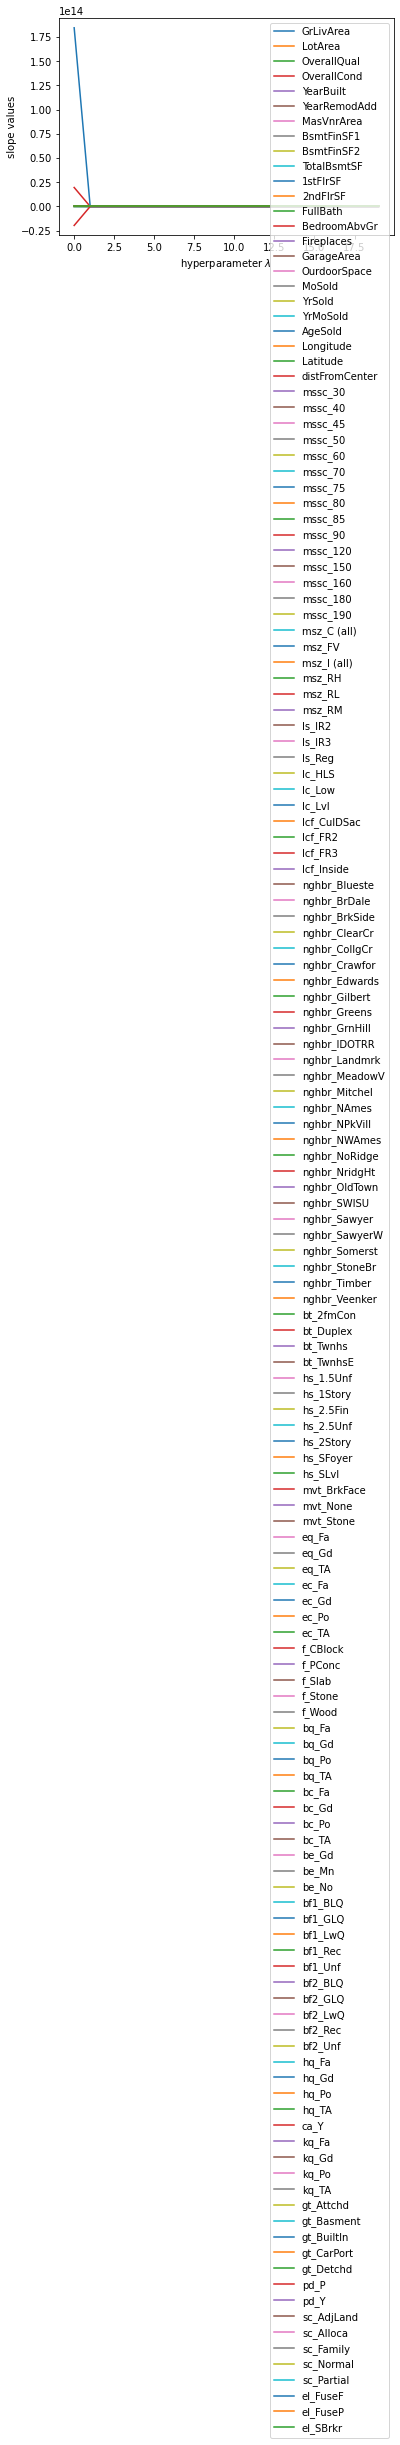

In [99]:
# plotting 
for name in coefs_ridge.columns:
    plt.plot(coefs_ridge.index, coefs_ridge[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)


# Now not all the lines are appearing?

In [100]:
coefs_ridge

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0,50.193835,0.404278,8460.809254,6393.654412,361.534174,1.111614e+11,30.195135,22.038285,18.988920,13.764949,...,-4360.058672,1755.216150,-11885.920563,2743.511343,-13558.171811,4804.854750,15515.346589,5895.578787,-2390.561059,-729.328854
1,50.918188,0.419074,8782.704670,6299.327172,364.311291,-6.443031e+01,31.179293,22.381384,18.658514,14.289164,...,-3978.395003,1824.428971,-5544.072764,2376.048531,-13262.091700,4902.144798,16007.791696,4992.663642,-1978.324396,-941.976188
2,51.225049,0.426161,9046.351920,6274.649081,369.096055,-6.311196e+01,32.022609,22.467811,18.451756,14.702889,...,-3719.177287,1818.777363,-3755.309889,1814.007284,-12713.835208,4785.073311,16001.224313,4664.889844,-1549.248998,-1009.601981
3,51.349191,0.430973,9265.208511,6268.086755,373.669278,-6.136576e+01,32.800147,22.500385,18.338843,15.047834,...,-3531.013398,1779.308591,-2903.771626,1428.576828,-12169.617590,4621.210892,15867.256303,4436.380188,-1327.744788,-1074.208017
4,51.366624,0.434568,9453.420713,6268.149686,377.846346,-5.948367e+01,33.518540,22.510652,18.264083,15.343160,...,-3381.285865,1728.092926,-2400.619849,1157.871129,-11655.273099,4439.679193,15676.047719,4247.876730,-1210.122266,-1136.539468
5,51.320635,0.437388,9618.780067,6270.887605,381.618858,-5.760835e+01,34.183952,22.509781,18.204931,15.600164,...,-3255.676262,1673.281343,-2066.393348,959.769843,-11176.749297,4252.253112,15456.106166,4082.898176,-1143.562576,-1195.664829
6,51.235998,0.439665,9766.183622,6274.672108,385.017433,-5.580046e+01,34.802340,22.502744,18.151729,15.826550,...,-3146.782209,1618.239091,-1827.211672,809.541710,-10733.670449,4064.691541,15221.920207,3934.660221,-1102.923679,-1251.146160
7,51.127539,0.441541,9898.987539,6278.759182,388.080384,-5.408345e+01,35.379022,22.492084,18.100158,16.027904,...,-3050.284447,1564.439442,-1646.922457,692.270124,-10323.622778,3880.080162,14981.703640,3799.569959,-1075.777573,-1302.904278
8,51.004481,0.443110,10019.629614,6282.788931,390.844930,-5.246376e+01,35.918592,22.479237,18.048280,16.208433,...,-2963.428984,1512.525323,-1505.699035,598.549679,-9943.660642,3700.132038,14740.395015,3675.373929,-1055.731918,-1351.044970
9,50.872745,0.444436,10129.954997,6286.583707,393.344716,-5.094003e+01,36.424977,22.465068,17.995284,16.371398,...,-2884.339113,1462.748922,-1391.745417,522.194544,-9590.861073,3525.789860,14501.056398,3560.491302,-1039.399260,-1395.759112


### `Elastic Net`

A hybrid penalized model which has two hyperparameters (alpha & rho). 
Alpha: equivalence of lambda, and controls the regularization strength
Rho: controls which mixture of Ridge and Lasso to use 


In [103]:
from sklearn.linear_model import ElasticNet 

n_rho = 10 
n_alpha = 20
alpharange = np.logspace(-2,5, n_alpha)
rhorange = np.linspace(0.1,1, n_rho) 
scores = np.zeros((n_rho, n_alpha))

elasticnet = ElasticNet(max_iter=10000, normalize=True)

for alphaIdx, alpha in enumerate(alpharange):
    for rhoIdx, rho in enumerate(rhorange):
        elasticnet.set_params(alpha=alpha, l1_ratio = rho)
        elasticnet.fit(x_train, y_train)
        scores[rhoIdx, alphaIdx] = elasticnet.score(x_test, y_test)



In [ ]:
random search
rmse by alpha plot 